Descargamos lar liberías con las versions que necesitamos a través del archivo 'requirements.txt'

In [873]:
!pip install -q -r  requirements.txt

In [874]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [875]:
df =pd.read_csv('data.csv')

In [876]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


La columna fnlwgt es una herramienta estadística esencial para asegurar que los resultados de la encuesta CPS sean generalizables a toda la población de Estados Unidos. Sin embargo, es importante tener en cuenta sus limitaciones al interpretarlos. Dado que el valor de dicha columna no es explicado se removerá, ya que en producción podría resultar en confución cuando el usuario ingrese sus datos.

In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      47876 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48568 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [877]:
df = df.drop(['fnlwgt'], axis=1)

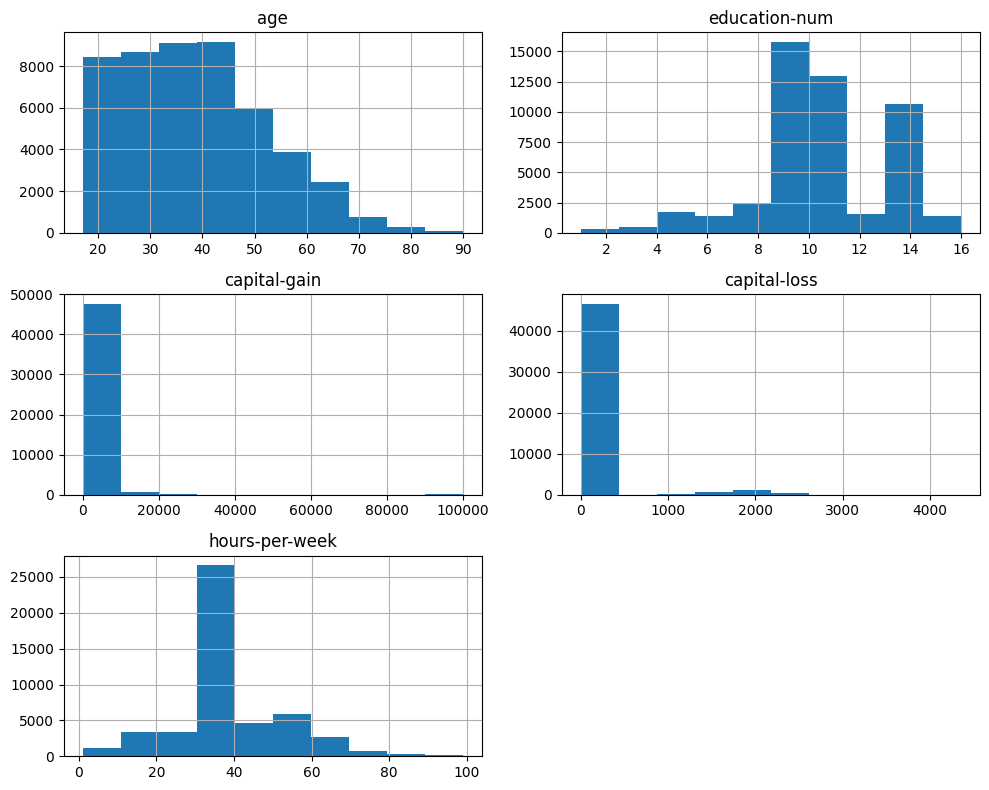

In [878]:
# Generar histogramas para cada variable numérica
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [880]:
# Mostrar las columnas con valores nulos
df.isnull().sum()[df.isnull().sum() != 0]

workclass         963
occupation        966
native-country    274
dtype: int64

In [881]:
# Valores diferentes de las columnas categoricas
for col in df.select_dtypes(include=['object']):
  print(f"Valores únicos en la columna '{col}': {df[col].unique()}")
  print('-------------------------')

Valores únicos en la columna 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
-------------------------
Valores únicos en la columna 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
-------------------------
Valores únicos en la columna 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
-------------------------
Valores únicos en la columna 'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
-------------------------
Valores únicos en la columna 'relationship': ['Not-in-family' 'Husb

In [882]:
# Se puede observar que la variable objetivo tiene errores ya solo debería de haber dos posibles valores y hay cuatro,
# ya que les está agregando un punto

df['income'] = df['income'].str.replace('.', '')

# Reemplazamos los valores '?' por NaN en las columnas especificadas
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']].replace('?', np.nan)


Ahora va a haber un mayor número de valores NaN ya que se reemplazaron los valores '?' por NaN, de forma que veremos los valores que realmente son nulos.

In [884]:
# Mostrar las columnas con valores nulos
df.isnull().sum()[df.isnull().sum() != 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [885]:
# En la columna 'sex' se cambia 'Male' a 1 y 'Female' a 0
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

In [886]:
print("Valores únicos en la columna 'capital-gain' y su conteo:")
print(df['capital-gain'].value_counts())

Valores únicos en la columna 'capital-gain' y su conteo:
capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64


In [887]:
print("Valores únicos en la columna 'capital-loss' y su conteo:")
print(df['capital-loss'].value_counts())

Valores únicos en la columna 'capital-loss' y su conteo:
capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64


In [888]:
# Se eliminan las columnas 'capital-gain', 'capital-loss' ya que tienen más del 80% de valores nulos, lo cual no es de utilidad
df = df.drop(['capital-gain', 'capital-loss'], axis=1)

In [889]:
# Se crean 5 categorias para el nivel de educación ya que es muy probable que esté correlacionado con la variable objetivo

new_education_order = {
    'Preschool': 'Pre-HS',
    '1st-4th': 'Pre-HS',
    '5th-6th': 'Pre-HS',
    '7th-8th': 'Pre-HS',
    '9th': 'Pre-HS',
    '10th': 'Pre-HS',
    '11th': 'Pre-HS',
    '12th': 'Pre-HS',
    'HS-grad': 'High-School',
    'Some-college': 'College',
    'Assoc-voc': 'College',
    'Assoc-acdm': 'College',
    'Bachelors': 'Bachelors',
    'Masters': 'Postgraduate',
    'Prof-school': 'Postgraduate',
    'Doctorate': 'Postgraduate'
}

df['education'] = df['education'].replace(new_education_order)


In [890]:
# Diccionario que mapee los valores de educación a un orden jerárquico
education_order = {
    'Pre-HS': 15,
    'High-School': 25,
    'College': 35,
    'Bachelors': 50,
    'Postgraduate': 60
}

df['education'] = df['education'].map(education_order)

In [891]:
# Ahora que se tiene una mejor segmentación de la columna 'education' se elimina 'education-num'
df = df.drop(['education-num'], axis=1)

In [892]:
df['marital-status'] = df['marital-status'].replace({
    'Married-AF-spouse': 30,
    'Married-civ-spouse': 30,
    'Married-spouse-absent':30,
    'Never-married': 45,
    'Divorced': 35,
    'Separated': 45,
    'Widowed': 45
})

print(df['marital-status'].value_counts())


marital-status
30    23044
45    19165
35     6633
Name: count, dtype: int64


In [893]:
# Al investigar la columna 'relationship' vemos que no es de utilidad aparente a la predicci´pon de la variable objetivo
df = df.drop(['relationship'], axis=1)

In [894]:
# Agrupamos las ocupaciones en 5 categorías jerárquicas basadas en la ganancia monetaria

occupation_mapping = {
    'Prof-specialty': 'High-Income',
    'Exec-managerial': 'High-Income',
    'Tech-support': 'Mid-Income',
    'Sales': 'Mid-Income',
    'Craft-repair': 'Mid-Income',
    'Protective-serv': 'Mid-Income',
    'Adm-clerical': 'Low-Income',
    'Farming-fishing': 'Low-Income',
    'Machine-op-inspct': 'Low-Income',
    'Transport-moving': 'Low-Income',
    'Handlers-cleaners': 'Low-Income',
    'Other-service': 'Low-Income',
    'Priv-house-serv': 'Low-Income',
    'Armed-Forces': 'Mid-Income',  # ya que puede variar según el rango del individuo
    np.nan: np.nan
}

df['occupation'] = df['occupation'].map(occupation_mapping)

In [895]:
# Crear un diccionario que mapee las categorías de ocupación a un orden jerárquico 0-30, 1-40, 2-50
occupation_order = {
    'Low-Income': 30,
    'Mid-Income': 40,
    'High-Income': 50,
    np.nan: np.nan
}

df['occupation'] = df['occupation'].map(occupation_order)

In [896]:
df.occupation.value_counts()

occupation
30.0    19715
40.0    14060
50.0    12258
Name: count, dtype: int64

In [897]:
df = df.drop(['workclass'], axis=1)

In [898]:
# Agrupamos las razas menos frecuentes en 'Other'
df['race'] = df['race'].replace({
    'White': 'White',
    'Black': 'Black',
    'Asian-Pac-Islander': 'Other',
    'Amer-Indian-Eskimo': 'Other',
    'Other': 'Other'
})

print(df['race'].value_counts())

race
White    41762
Black     4685
Other     2395
Name: count, dtype: int64


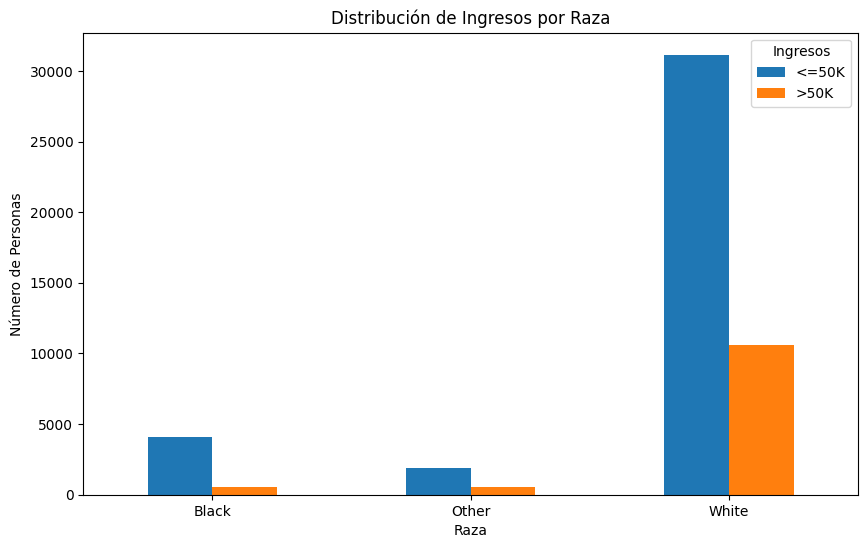

In [899]:
# Agrupamos los datos por raza e ingresos y contamos las ocurrencias
race_income_counts = df.groupby(['race', 'income'])['income'].count().unstack()

race_income_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de Ingresos por Raza')
plt.xlabel('Raza')
plt.ylabel('Número de Personas')
plt.xticks(rotation=0)
plt.legend(title='Ingresos', loc='upper right')
plt.show()

In [900]:
# Crear una nueva columna 'race_income_ratio' que represente la proporción de personas con ingresos >50K para cada raza
race_income_ratio = df.groupby('race')['income'].apply(lambda x: (x == '>50K').mean())
df['race_income_ratio'] = df['race'].map(race_income_ratio)
df = df.drop('race', axis=1)

In [901]:
race_income_ratio

race
Black    0.120811
Other    0.214614
White    0.253987
Name: income, dtype: float64

In [902]:
df['race_income_ratio'] = df['race_income_ratio'] * 200

In [903]:
df.head()

,age,education,marital-status,occupation,sex,hours-per-week,native-country,income,race_income_ratio
0,39,50,45,30.0,1,40,United-States,<=50K,50.797376
1,50,50,30,50.0,1,13,United-States,<=50K,50.797376
2,38,25,35,30.0,1,40,United-States,<=50K,50.797376
3,53,15,30,30.0,1,40,United-States,<=50K,24.162220
4,28,50,30,50.0,0,40,Cuba,<=50K,24.162220


In [904]:
country_counts = df['native-country'].value_counts()

# Definir un umbral para países menos frecuentes (por ejemplo, menos del 1% de los datos)
threshold = 0.01 * len(df)
less_frequent_countries = country_counts[country_counts < threshold].index
df['native-country'] = df['native-country'].replace(less_frequent_countries, 'Other')

# Crear una nueva columna 'country_income_ratio' que represente la proporción de personas con ingresos >50K para cada país
country_income_ratio = df.groupby('native-country')['income'].apply(lambda x: (x == '>50K').mean())
df['country_income_ratio'] = df['native-country'].map(country_income_ratio)
df['country_income_ratio'] = df['country_income_ratio'] * 200
df = df.drop('native-country', axis=1)
df.head()

,age,education,marital-status,occupation,sex,hours-per-week,income,race_income_ratio,country_income_ratio
0,39,50,45,30.0,1,40,<=50K,50.797376,48.795401
1,50,50,30,50.0,1,13,<=50K,50.797376,48.795401
2,38,25,35,30.0,1,40,<=50K,50.797376,48.795401
3,53,15,30,30.0,1,40,<=50K,24.162220,48.795401
4,28,50,30,50.0,0,40,<=50K,24.162220,45.346658


In [925]:
country_income_ratio

native-country
Mexico           0.049422
Other            0.226733
United-States    0.243977
Name: income, dtype: float64

In [905]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])
df = df.round(3)
df['country_income_ratio'].fillna(df['country_income_ratio'].mean(), inplace=True)

In [906]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)  # Puedes ajustar el número de vecinos según el caso
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [907]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48842 non-null  float64
 1   education             48842 non-null  float64
 2   marital-status        48842 non-null  float64
 3   occupation            48842 non-null  float64
 4   sex                   48842 non-null  float64
 5   hours-per-week        48842 non-null  float64
 6   income                48842 non-null  float64
 7   race_income_ratio     48842 non-null  float64
 8   country_income_ratio  48842 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


In [909]:
df_imputed.head()

,age,education,marital-status,occupation,sex,hours-per-week,income,race_income_ratio,country_income_ratio
0,39.0,50.0,45.0,30.0,1.0,40.0,0.0,50.797,48.795
1,50.0,50.0,30.0,50.0,1.0,13.0,0.0,50.797,48.795
2,38.0,25.0,35.0,30.0,1.0,40.0,0.0,50.797,48.795
3,53.0,15.0,30.0,30.0,1.0,40.0,0.0,24.162,48.795
4,28.0,50.0,30.0,50.0,0.0,40.0,0.0,24.162,45.347


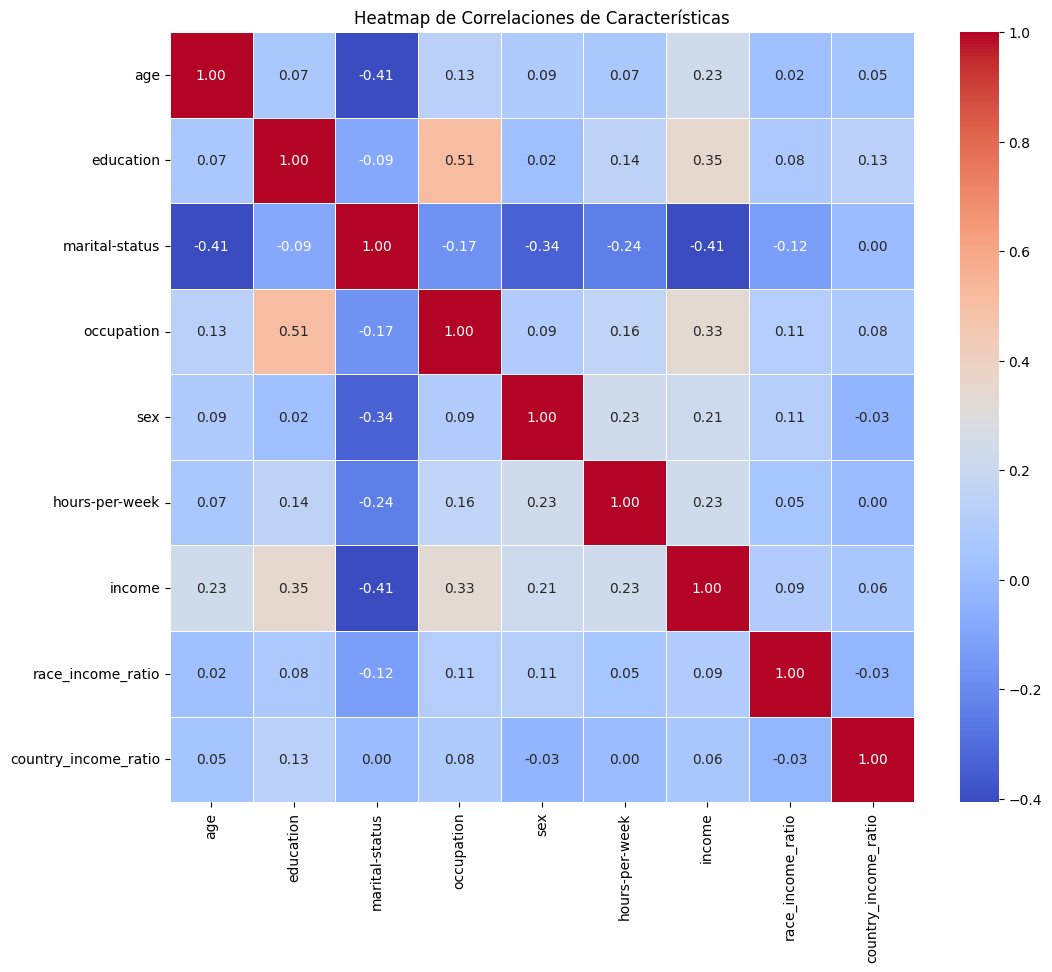

In [912]:
correlation_matrix = df_imputed.corr()
# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlaciones de Características')
plt.show()

In [913]:
#sns.pairplot(df,hue='income')
#plt.show()

Conclusiones del pairplot

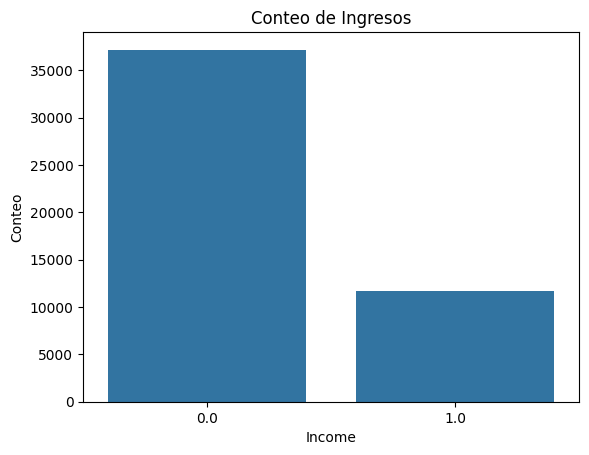

In [914]:
# Gráfica del conteo de 'income'
sns.countplot(x='income', data=df_imputed)
plt.title('Conteo de Ingresos')
plt.xlabel('Income')
plt.ylabel('Conteo')
plt.show()

In [915]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb


In [916]:
# prompt: para el df_imputed crea un SMOTE para balancear el dataset con sampleo KNN

from imblearn.over_sampling import SMOTE

# Inicializar SMOTE con muestreo KNN
smote = SMOTE(sampling_strategy='auto', k_neighbors=2)  # Puedes ajustar k_neighbors según sea necesario

# Separar características y variable objetivo
X = df_imputed.drop('income', axis=1)
y = df_imputed['income']

# Aplicar SMOTE para balancear el dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame balanceado
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['income'])], axis=1)

df_balanced.head()


,age,education,marital-status,occupation,sex,hours-per-week,race_income_ratio,country_income_ratio,income
0,39.0,50.0,45.0,30.0,1.0,40.0,50.797,48.795,0.0
1,50.0,50.0,30.0,50.0,1.0,13.0,50.797,48.795,0.0
2,38.0,25.0,35.0,30.0,1.0,40.0,50.797,48.795,0.0
3,53.0,15.0,30.0,30.0,1.0,40.0,24.162,48.795,0.0
4,28.0,50.0,30.0,50.0,0.0,40.0,24.162,45.347,0.0


In [917]:
df_balanced.to_csv('df_to_verify.csv',index=False)

In [918]:
df_balanced['income'].value_counts()

income
0.0    37155
1.0    37155
Name: count, dtype: int64

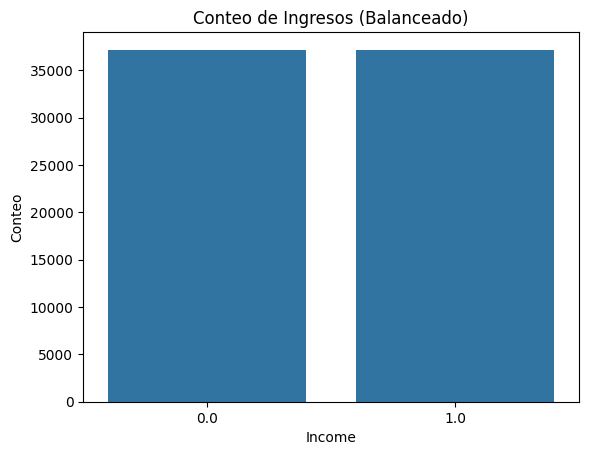

In [919]:
# Gráfica del conteo de 'income' después del balanceo
sns.countplot(x='income', data=df_balanced)
plt.title('Conteo de Ingresos (Balanceado)')
plt.xlabel('Income')
plt.ylabel('Conteo')
plt.show()


In [920]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop('income', axis=1), df_balanced['income'], test_size=0.2, random_state=42)

# Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier(),  # Reemplazar Decision Tree con XGBoost
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Crear un diccionario para almacenar las métricas
metrics = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Crear un DataFrame a partir de las métricas
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Mostrar la tabla de métricas
print(metrics_df)


                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.786772   0.769824  0.812975  0.790811
XGBoost                 0.849886   0.818317  0.896173  0.855477
Random Forest           0.853923   0.833269  0.881786  0.856841
Support Vector Machine  0.803458   0.768053  0.864685  0.813510


In [921]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Tomando XGBoost como el modelo a usar
model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del mejor modelo:", accuracy)

Mejores hiperparámetros: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Precisión del mejor modelo: 0.853720898936886


In [922]:
# Evaluar el modelo base (sin ajuste de hiperparámetros) en los datos de prueba
base_model = xgb.XGBClassifier()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

# Calcular las métricas para el modelo base
base_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_base),
    'Precision': precision_score(y_test, y_pred_base),
    'Recall': recall_score(y_test, y_pred_base),
    'F1-Score': f1_score(y_test, y_pred_base)
}

# Calcular las métricas para el mejor modelo (con ajuste de hiperparámetros)
best_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

# Crear un DataFrame para comparar las métricas
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Modelo Base': [base_metrics[metric] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']],
    'Mejor Modelo': [best_metrics[metric] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
})

print(comparison_df)


     Métrica  Modelo Base  Mejor Modelo
0   Accuracy     0.849886      0.853721
1  Precision     0.818317      0.826502
2     Recall     0.896173      0.892237
3   F1-Score     0.855477      0.858113


In [923]:
import pickle

# Guardar el modelo en un archivo .pkl
with open('mejor_modelo.pkl', 'wb') as f:
    pickle.dump(best_model, f)

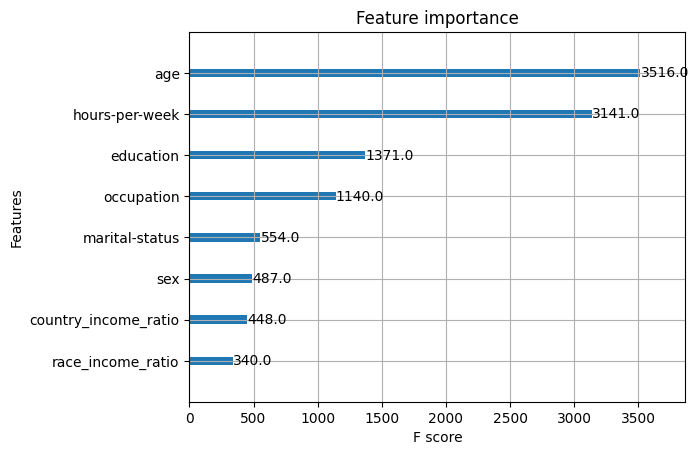

In [924]:
# Visualiza la importancia de las características
xgb.plot_importance(best_model, importance_type='weight')
plt.show()